In [24]:
#what is the approproate level of correct_ratio to be used ?

import pandas as pd
import requests
import re
import difflib 
import numpy as np

import fuzzywuzzy

from fuzzywuzzy import process

from fuzzywuzzy import fuzz 

np.random.seed(0)


In [25]:

men=pd.read_csv('menWithRace.csv')
women=pd.read_csv('womenWithRace.csv')
scrap=pd.read_csv('scrapped_Jan4.csv')


/var/folders/sf/72qw163j6sv68zg_2cx67t_h0000gn/T/ipykernel_18318/3815555716.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  men=pd.read_csv('menWithRace.csv')
/var/folders/sf/72qw163j6sv68zg_2cx67t_h0000gn/T/ipykernel_18318/3815555716.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  women=pd.read_csv('womenWithRace.csv')


In [26]:
men['match']=men['athlete_display_name']
women['match']=women['athlete_display_name']

scrap['match']=scrap['full_name']


In [27]:
men_names=pd.DataFrame(men['match'].unique(),columns =['Match'])
women_names=pd.DataFrame(women['match'].unique(),columns =['Match'])
scrap_names=pd.DataFrame(scrap['match'].unique(),columns =['Match'])


In [5]:
women_names

,Match
0,Deborah Aboagaye
1,Madeleine Adams
2,Autumn Agar
3,Carly Ahlstrom
4,Megan Ahlstrom
...,...
8150,Cayson Connor
8151,Nadia Reeese
8152,Anne Hamilton Leary
8153,Bairesha Gill-Myles


In [28]:
#fuzzy mathcing function
def checker(wrong_options,correct_options):
    names_array=[]
    ratio_array=[]    
    for wrong_option in wrong_options:
        if wrong_option in correct_options:
           names_array.append(wrong_option)
           ratio_array.append('100')
        else:   
            x=process.extractOne(wrong_option,correct_options,scorer=fuzz.token_set_ratio)
            names_array.append(x[0])
            ratio_array.append(x[1])
    return names_array,ratio_array

In [29]:
men_uniq = men_names['Match'].fillna('######').tolist()

women_uniq = women_names['Match'].fillna('######').tolist()

scrap_uniq = scrap_names['Match'].fillna('######').tolist()


In [30]:
#matching scrapped names with mens_names file
name_match,ratio_match=checker(men_uniq,scrap_uniq)
men_match = pd.DataFrame()
men_match['original_names']=pd.Series(men_uniq)
men_match['matched_names']=pd.Series(name_match)
men_match['correct_ratio']=pd.Series(ratio_match)


In [31]:
#matching scrapped names with womens_names file
name_match,ratio_match=checker(women_uniq,scrap_uniq)
women_match = pd.DataFrame()
women_match['original_names']=pd.Series(women_uniq)
women_match['matched_names']=pd.Series(name_match)
women_match['correct_ratio']=pd.Series(ratio_match)


In [32]:
#converting the scores to ints from strings 

women_match['correct_ratio'] = women_match['correct_ratio'].astype(int)
men_match['correct_ratio'] = men_match['correct_ratio'].astype(int)


In [11]:
# we can see that a correct_ratio of 100 indicates a perfect match
women_match[women_match['correct_ratio'] == 100]


,original_names,matched_names,correct_ratio
2133,Andra Espinoza-Hunter,Andra Espinoza-Hunter,100
2333,Abby Meyers,Abby Meyers,100
2653,Alexis Stover,Alexis Stover,100
2915,Marnelle Garraud,Marnelle Garraud,100
2964,Mimi Reid,Mimi Reid,100
3032,Madi Williams,Madi Williams,100
3062,Sam Haiby,Sam Haiby,100
3110,Jamirah Shutes,Jamirah Shutes,100
3394,Ciaja Harbison,Ciaja Harbison,100
3736,Avery LaBarbera,Avery LaBarbera,100


In [13]:
men_match[men_match['correct_ratio'] == 100]

,original_names,matched_names,correct_ratio
22,Narcisse Ambanza,Narcisse Ambanza,100
60,Adam Benrabah,Adam Benrabah,100
134,Don Dayrit,Don Dayrit,100
150,Dwight (DJ) Dixon,DJ Dixon,100
226,Shaquille Harris,Shaquille Harris,100
...,...,...,...
8650,Mitchell Paul,Mitchell Paul,100
8659,Daniel Nauseef,Daniel Nauseef,100
8666,Justus Jackson,Justus Jackson,100
8670,Jevon Johnson,Jevon Johnson,100


In [12]:
# we can see that a correct_Ratio of less than 90 seems to yield inconsistent results 
women_match[women_match['correct_ratio'] == 89].head()

,original_names,matched_names,correct_ratio
1606,Jordan Hobson,Jordan Horston,89
2185,Jade Williams,Jalen Williams,89
4124,Jena' Williams,Jalen Williams,89
4863,Mady Aulbach,Madylyn Aulbach,89
7375,Kendall Folley,Kendall Coley,89


<AxesSubplot:ylabel='Frequency'>

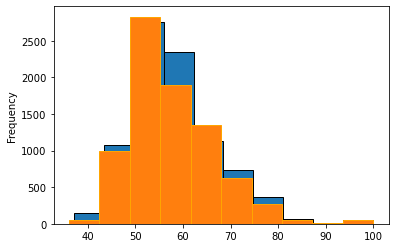

In [13]:
#plotting the distribution of matches, we see that only about 500
#or so names have a good match for each genders 
#this compels us to expand web scrapping to more athletes)
men_match['correct_ratio'].plot(kind='hist', edgecolor='black')
women_match['correct_ratio'].plot(kind='hist', edgecolor='orange')


In [34]:
women_match

,original_names,matched_names,correct_ratio
0,Deborah Aboagaye,Amari DeBerry,48
1,Madeleine Adams,Adam Miller,62
2,Autumn Agar,Justin Amadi,52
3,Carly Ahlstrom,Malia Magestro,57
4,Megan Ahlstrom,Meghan Huerter,64
...,...,...,...
8150,Cayson Connor,Connor Essegian,64
8151,Nadia Reeese,Jada Peebles,67
8152,Anne Hamilton Leary,Diamond Miller,55
8153,Bairesha Gill-Myles,Le’Andrea Gillis,69


In [14]:
#filtering only matches with >= 90 correct rartio
#men_match_filtered=men_match[men_match['correct_ratio'] >= 90]
#women_match_filtered=women_match[women_match['correct_ratio'] >= 90]

In [15]:
#men_match_filtered['match']=men_match_filtered['original_names']
#women_match_filtered['match']=women_match_filtered['original_names']


/var/folders/sf/72qw163j6sv68zg_2cx67t_h0000gn/T/ipykernel_18318/3703985176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_match_filtered['match']=men_match_filtered['original_names']
/var/folders/sf/72qw163j6sv68zg_2cx67t_h0000gn/T/ipykernel_18318/3703985176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_match_filtered['match']=women_match_filtered['original_names']


In [35]:
men_match['match']=men_match['original_names']
women_match['match']=women_match['original_names']


In [36]:
# joining the original datasets with matched names 
men=men.merge(men_match, on='match', how='left')
women=women.merge(women_match, on='match', how='left')


In [39]:
men

,Unnamed: 0,athlete_id,athlete_display_name,athlete_position_abbreviation,team_short_display_name,state,team_id,game_date,treatment,period,...,pts,OWS,DWS,WS,WS.40,Race,match,original_names,matched_names,correct_ratio
0,1,acimovic-milan,Milan Acimovic,na,Algoma,na,algoma,10/27/2019,0,0,...,0,-0.024745,0.000000,-0.024745,-0.164965601,white,Milan Acimovic,Milan Acimovic,Jillian Archer,50
1,2,acimovic-milan,Milan Acimovic,na,Algoma,na,algoma,11/3/2019,0,0,...,15,0.149369,-0.049829,0.099541,0.265441802,white,Milan Acimovic,Milan Acimovic,Jillian Archer,50
2,3,acimovic-milan,Milan Acimovic,na,Algoma,na,algoma,11/10/2019,0,0,...,0,-0.155401,0.123740,-0.031661,-0.090460183,white,Milan Acimovic,Milan Acimovic,Jillian Archer,50
3,4,adams-travis,Travis Adams,na,Saint Marys,na,saint-marys,11/3/2019,0,0,...,8,-0.098123,0.144302,0.046180,0.061572797,white,Travis Adams,Travis Adams,Adam Miller,52
4,5,adams-travis,Travis Adams,na,Saint Marys,na,saint-marys,11/10/2019,0,0,...,8,0.001414,0.030185,0.031599,0.035109902,white,Travis Adams,Travis Adams,Adam Miller,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139647,139648,4947517,Ken Evans Jr.,ATH,Jackson State,MS,2296,2/27/2022,1,1,...,11,-0.030916,0.062280,0.031363,0.040468934,white,Ken Evans Jr.,Ken Evans Jr.,Keon Edwards,58
139648,139649,4960805,Omorede Rainey Jr.,ATH,Iona,NY,314,3/6/2022,1,1,...,0,-0.053188,0.000000,-0.053188,-2.127521673,white,Omorede Rainey Jr.,Omorede Rainey Jr.,Jaren Morton,48
139649,139650,4972498,Edwar Hampton-Oliver,ATH,SC State,SC,2569,3/13/2022,1,1,...,3,0.007084,0.016109,0.023193,0.115962706,other,Edwar Hampton-Oliver,Edwar Hampton-Oliver,Diamond Miller,53
139650,139651,4972499,"Antonio ""Tj Madlock",ATH,SC State,SC,2569,3/13/2022,1,1,...,19,0.070427,0.089755,0.160182,0.183065692,black,"Antonio ""Tj Madlock","Antonio ""Tj Madlock",Micole Cayton,45


In [17]:
men_test=men

In [38]:
men.drop("Unnamed: 0",axis=1)
women.drop("Unnamed: 0",axis=1)


,athlete_id,athlete_display_name,athlete_position_abbreviation,team_short_display_name,state,team_id,game_date,treatment,period,games_played,...,pts,OWS,DWS,WS,WS.40,race,match,original_names,matched_names,correct_ratio
0,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-11-17,0,0,2,...,20,0.120370,0.063125,0.183495,0.111209,white,Deborah Aboagaye,Deborah Aboagaye,Amari DeBerry,48
1,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-11-24,0,0,2,...,31,0.401921,0.159852,0.561773,0.299612,white,Deborah Aboagaye,Deborah Aboagaye,Amari DeBerry,48
2,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-12-01,0,0,1,...,2,-0.206911,0.221038,0.014127,0.016146,white,Deborah Aboagaye,Deborah Aboagaye,Amari DeBerry,48
3,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2020-01-19,0,0,2,...,21,0.092420,0.154169,0.246589,0.138924,white,Deborah Aboagaye,Deborah Aboagaye,Amari DeBerry,48
4,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2020-01-26,0,0,2,...,2,-0.075543,0.078344,0.002801,0.002286,white,Deborah Aboagaye,Deborah Aboagaye,Amari DeBerry,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135690,4921155,Nadia Reeese,ATH,SC State,SC,2569,2022-02-20,1,1,1,...,0,-0.052189,-0.011210,-0.063398,-0.149172,white,Nadia Reeese,Nadia Reeese,Jada Peebles,67
135691,4921156,Jaida Ford,ATH,SC State,SC,2569,2022-02-20,1,1,1,...,0,0.000000,0.000000,0.000000,0.000000,white,Jaida Ford,Jaida Ford,Jahki Howard,64
135692,4934100,Anne Hamilton Leary,ATH,Longwood,VA,2344,2022-02-20,1,1,1,...,10,0.107648,0.120822,0.228471,0.415401,white,Anne Hamilton Leary,Anne Hamilton Leary,Diamond Miller,55
135693,4950360,Bairesha Gill-Myles,ATH,MD-Eastern,MD,2379,2022-03-06,1,1,1,...,2,-0.016439,0.043317,0.026878,0.037074,other,Bairesha Gill-Myles,Bairesha Gill-Myles,Le’Andrea Gillis,69


In [44]:
men['correct_ratio']

0         50
1         50
2         50
3         52
4         52
          ..
139647    58
139648    48
139649    53
139650    45
139651    43
Name: correct_ratio, Length: 139652, dtype: int64

In [40]:
scrap['matched_names']=scrap['match']


In [41]:
#merging the scraped data and original dataset 
men=men.merge(scrap, on='matched_names', how='left')
women=women.merge(scrap, on='matched_names', how='left')


In [42]:
men

,Unnamed: 0,athlete_id,athlete_display_name,athlete_position_abbreviation,team_short_display_name,state,team_id,game_date,treatment,period,...,InstagramReach,twitterReach,instagramHandle,twitterHandle,biography,profileLink,Athlete_type,Sport,full_name,match_y
0,1,acimovic-milan,Milan Acimovic,na,Algoma,na,algoma,10/27/2019,0,0,...,0,492,www.instagram.com/jillianarcher14,www.twitter.com/jillian_archer,My name is Jillian Archer. I am a forward at S...,https://opendorse.com/profile/jillian-archer,"""StudentAthlete""","""Women\s Basketball""",Jillian Archer,Jillian Archer
1,2,acimovic-milan,Milan Acimovic,na,Algoma,na,algoma,11/3/2019,0,0,...,0,492,www.instagram.com/jillianarcher14,www.twitter.com/jillian_archer,My name is Jillian Archer. I am a forward at S...,https://opendorse.com/profile/jillian-archer,"""StudentAthlete""","""Women\s Basketball""",Jillian Archer,Jillian Archer
2,3,acimovic-milan,Milan Acimovic,na,Algoma,na,algoma,11/10/2019,0,0,...,0,492,www.instagram.com/jillianarcher14,www.twitter.com/jillian_archer,My name is Jillian Archer. I am a forward at S...,https://opendorse.com/profile/jillian-archer,"""StudentAthlete""","""Women\s Basketball""",Jillian Archer,Jillian Archer
3,4,adams-travis,Travis Adams,na,Saint Marys,na,saint-marys,11/3/2019,0,0,...,125776,16153,www.instagram.com/acewolf44,www.twitter.com/AceWolf44,What’s going on Adam Miller AceWolf building t...,https://opendorse.com/profile/adam-miller,"""StudentAthlete""","""Basketball""",Adam Miller,Adam Miller
4,5,adams-travis,Travis Adams,na,Saint Marys,na,saint-marys,11/10/2019,0,0,...,125776,16153,www.instagram.com/acewolf44,www.twitter.com/AceWolf44,What’s going on Adam Miller AceWolf building t...,https://opendorse.com/profile/adam-miller,"""StudentAthlete""","""Basketball""",Adam Miller,Adam Miller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139647,139648,4947517,Ken Evans Jr.,ATH,Jackson State,MS,2296,2/27/2022,1,1,...,5142,1192,www.instagram.com/kce35,www.twitter.com/Keoniswinning,Family oriented basketball player who values h...,https://opendorse.com/profile/keon-edwards,"""StudentAthlete""","""Men\s Basketball""",Keon Edwards,Keon Edwards
139648,139649,4960805,Omorede Rainey Jr.,ATH,Iona,NY,314,3/6/2022,1,1,...,0,No Account,www.instagram.com/drizzling2s.jar,NaN,I am a sophomore in college majoring in busine...,https://opendorse.com/profile/jaren-morton,"""StudentAthlete""","""Basketball""",Jaren Morton,Jaren Morton
139649,139650,4972498,Edwar Hampton-Oliver,ATH,SC State,SC,2569,3/13/2022,1,1,...,7882,No Account,www.instagram.com/diamondm1ller,NaN,I am currently a student athlete of the Univer...,https://opendorse.com/profile/diamond-miller,"""StudentAthlete""","""Women\s Basketball""",Diamond Miller,Diamond Miller
139650,139651,4972499,"Antonio ""Tj Madlock",ATH,SC State,SC,2569,3/13/2022,1,1,...,5724,1288,www.instagram.com/micole_cayton5,www.twitter.com/micole_cayton,I am. I come from a family full of educators ...,https://opendorse.com/profile/micole-cayton,"""StudentAthlete""","""Women\s Basketball""",Micole Cayton,Micole Cayton


In [45]:
#removing Rows with NAs 
men_final=men.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
women_final=women.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

In [46]:
#dropping redundant columns 
men_final.drop(['match_x', 'original_names','matched_names','match_y',"Unnamed: 0"],axis=1)
women_final.drop(['match_x', 'original_names','matched_names','match_y',"Unnamed: 0"],axis=1)


,athlete_id,athlete_display_name,athlete_position_abbreviation,team_short_display_name,state,team_id,game_date,treatment,period,games_played,...,current_team,InstagramReach,twitterReach,instagramHandle,twitterHandle,biography,profileLink,Athlete_type,Sport,full_name
0,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-11-17,0,0,2,...,UConn Huskies,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry
1,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-11-24,0,0,2,...,UConn Huskies,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry
2,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-12-01,0,0,1,...,UConn Huskies,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry
3,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2020-01-19,0,0,2,...,UConn Huskies,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry
4,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2020-01-26,0,0,2,...,UConn Huskies,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135686,4917389,Mizani Johnson,C,Delaware State,DE,2169,2022-03-06,1,1,2,...,Avila University,0,87,www.instagram.com/thevibeswithbj,www.twitter.com/BJJohnson15,Welcome! I am a humbling student-athlete at Av...,https://opendorse.com/profile/16v7H2muU,"""StudentAthlete""","""Basketball""",Brandon Johnson
135687,4917389,Mizani Johnson,C,Delaware State,DE,2169,2022-03-13,1,1,1,...,Avila University,0,87,www.instagram.com/thevibeswithbj,www.twitter.com/BJJohnson15,Welcome! I am a humbling student-athlete at Av...,https://opendorse.com/profile/16v7H2muU,"""StudentAthlete""","""Basketball""",Brandon Johnson
135688,4917719,Elles Van Der Maas,ATH,Yale,CT,43,2022-02-06,1,1,1,...,Wyoming Athletics,0,241,www.instagram.com/emilymellemaa,www.twitter.com/MellemaEmily,Wyoming WBB #2,https://opendorse.com/profile/emily-mellema,"""StudentAthlete""","""Women\s Basketball""",Emily Mellema
135691,4921156,Jaida Ford,ATH,SC State,SC,2569,2022-02-20,1,1,1,...,Southern California Trojans,0,2117,www.instagram.com/showtime_ki,www.twitter.com/showtime_ki,http://insider.espn.com/college-sports/basketb...,https://opendorse.com/profile/jahki-howard,"""StudentAthlete""","""Basketball""",Jahki Howard


In [47]:
#resetting index
men_final.reset_index(drop=True)

women_final.reset_index(drop=True)

,Unnamed: 0,athlete_id,athlete_display_name,athlete_position_abbreviation,team_short_display_name,state,team_id,game_date,treatment,period,...,InstagramReach,twitterReach,instagramHandle,twitterHandle,biography,profileLink,Athlete_type,Sport,full_name,match_y
0,1,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-11-17,0,0,...,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry,Amari DeBerry
1,2,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-11-24,0,0,...,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry,Amari DeBerry
2,3,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2019-12-01,0,0,...,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry,Amari DeBerry
3,4,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2020-01-19,0,0,...,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry,Amari DeBerry
4,5,aboagaye-deborah,Deborah Aboagaye,na,Bishops,na,bishops,2020-01-26,0,0,...,6617,2397,www.instagram.com/amarideberry42,www.twitter.com/amari_deberry,Sign Language \\nSocial Media \\nModeling \\nN...,https://opendorse.com/profile/amari-deberry,"""StudentAthlete""","""Women\s Basketball""",Amari DeBerry,Amari DeBerry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110743,135687,4917389,Mizani Johnson,C,Delaware State,DE,2169,2022-03-06,1,1,...,0,87,www.instagram.com/thevibeswithbj,www.twitter.com/BJJohnson15,Welcome! I am a humbling student-athlete at Av...,https://opendorse.com/profile/16v7H2muU,"""StudentAthlete""","""Basketball""",Brandon Johnson,Brandon Johnson
110744,135688,4917389,Mizani Johnson,C,Delaware State,DE,2169,2022-03-13,1,1,...,0,87,www.instagram.com/thevibeswithbj,www.twitter.com/BJJohnson15,Welcome! I am a humbling student-athlete at Av...,https://opendorse.com/profile/16v7H2muU,"""StudentAthlete""","""Basketball""",Brandon Johnson,Brandon Johnson
110745,135689,4917719,Elles Van Der Maas,ATH,Yale,CT,43,2022-02-06,1,1,...,0,241,www.instagram.com/emilymellemaa,www.twitter.com/MellemaEmily,Wyoming WBB #2,https://opendorse.com/profile/emily-mellema,"""StudentAthlete""","""Women\s Basketball""",Emily Mellema,Emily Mellema
110746,135692,4921156,Jaida Ford,ATH,SC State,SC,2569,2022-02-20,1,1,...,0,2117,www.instagram.com/showtime_ki,www.twitter.com/showtime_ki,http://insider.espn.com/college-sports/basketb...,https://opendorse.com/profile/jahki-howard,"""StudentAthlete""","""Basketball""",Jahki Howard,Jahki Howard


In [48]:
#data inconsistancies are observed in the original CSV athlete id varying between string and numbers 

men_final=men_final.drop(["Unnamed: 0"],axis=1)
women_final=women_final.drop(["Unnamed: 0"],axis=1)



In [49]:
men_final=men_final.reset_index(drop=True)
women_final=women_final.reset_index(drop=True)

0         50
1         50
2         50
3         52
4         52
          ..
114993    50
114994    53
114995    58
114996    45
114997    43
Name: correct_ratio, Length: 114998, dtype: int64

In [52]:
#saving to csv
men_final.to_csv('men_finaljan4.csv')
women_final.to_csv('women_finaljan4.csv')


In [102]:
scrap.describe()

,first_name,last_name,current_team,InstagramReach,twitterReach,instagramHandle,twitterHandle,biography,profileLink,full_name,match,matched_names
count,1568,1568,1438,1568,1568,1356,1134,1426,1568,1568,1568,1568
unique,1029,1149,406,669,889,1350,1128,1182,1561,1559,1559,1559
top,Jordan,Williams,Campbellsville Tigers,0,No Account,www.instagram.com/ben_kraskaa,www.twitter.com/zgonsoulin_21,", "",",https://opendorse.com/profile/ben-kraska?from=...,Jalen Williams,Jalen Williams,Jalen Williams
freq,16,27,35,649,430,2,2,238,2,2,2,2
